In [27]:
# 패키지 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import collections
import seaborn as sns

In [6]:
# 데이터 불러오기
dataset = pd.read_excel("example_data_220222.xlsx", sheet_name = "thrombolysis20220222",index_col = 0)

In [7]:
dataset
#unique함수 사용해서 범주형 코딩값 출력

,modality_ivtpa,modality_iauk,modality_mechanical,modality_etc,pt_birth,sex,body_height,body_weight,waist,adm_date,...,com_connective_dz,com_anemia,com_dm,com_dm_end_organ,com_hiv,com_solid_tumor,com_leukemia,com_lymphoma,com_metastatic_tumor,active_cancer
pt_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1969-03-28,1,177.0,87.0,98.0,2015-12-21,...,2.0,2.0,2,2,2,2,2,2,2,2.0
2,1,0,1,0,1944-10-31,2,152.0,61.0,NaN,2015-12-26,...,2.0,2.0,2,2,2,1,2,2,2,2.0
3,1,0,0,0,1953-05-01,1,170.0,70.0,92.0,2015-11-01,...,2.0,2.0,1,2,2,2,2,2,2,2.0
4,0,0,1,0,1957-12-20,2,153.0,62.0,NaN,2017-04-17,...,2.0,2.0,1,2,2,2,2,2,2,2.0
5,1,0,0,0,1941-02-06,1,177.0,74.0,NaN,2005-11-02,...,2.0,2.0,2,2,2,2,2,2,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2314,0,0,1,0,1936-06-25,1,165.0,52.0,NaN,2019-07-31,...,2.0,1.0,1,2,2,2,2,2,2,2.0
2315,0,0,1,0,1943-05-01,2,153.0,56.0,NaN,2019-08-05,...,2.0,2.0,1,2,2,2,2,2,2,2.0
2316,0,0,1,0,1936-08-22,2,156.0,47.0,NaN,2019-08-13,...,2.0,2.0,2,2,2,2,2,2,2,2.0


In [11]:
#데이터 프레임 속성 파악(행,열 개수)
print(dataset.shape)

In [12]:
#데이터 프레임 속성 파악
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2318 entries, 1 to 2318
Columns: 103 entries, modality_ivtpa to active_cancer
dtypes: float64(26), int64(70), object(7)
memory usage: 1.8+ MB


In [20]:
#결측치 확인
dataset.isnull().sum()

modality_ivtpa          0
modality_iauk           0
modality_mechanical     0
modality_etc            0
pt_birth                0
                       ..
com_solid_tumor         0
com_leukemia            0
com_lymphoma            0
com_metastatic_tumor    0
active_cancer           3
Length: 103, dtype: int64

In [15]:
# 데이터 프레임 속성 파악(기술통계량)
dataset.describe()

,modality_ivtpa,modality_iauk,modality_mechanical,modality_etc,sex,body_height,body_weight,waist,initial_sbp_cal,initial_dbp_cal,...,com_connective_dz,com_anemia,com_dm,com_dm_end_organ,com_hiv,com_solid_tumor,com_leukemia,com_lymphoma,com_metastatic_tumor,active_cancer
count,2318.000000,2318.000000,2318.000000,2318.00000,2318.000000,2279.000000,2286.000000,1733.000000,2318.000000,2318.000000,...,2317.000000,2316.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2315.000000
mean,0.667817,0.118637,0.491803,0.01855,1.414582,163.049144,62.537275,85.001731,149.163072,83.816221,...,1.989642,1.722798,1.569456,1.975841,1.999569,1.925367,1.998706,1.993097,1.962899,1.945140
std,0.471098,0.323430,0.500041,0.13496,0.492756,8.888651,11.603529,9.679417,28.608503,16.604903,...,0.101269,0.447714,0.495259,0.153575,0.020770,0.262855,0.035960,0.082812,0.189050,0.227755
min,0.000000,0.000000,0.000000,0.00000,1.000000,131.000000,30.000000,54.000000,57.000000,30.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.00000,1.000000,156.000000,55.000000,78.000000,130.000000,72.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,1.000000,0.000000,0.000000,0.00000,1.000000,163.000000,62.000000,85.000000,148.000000,81.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,1.000000,0.000000,1.000000,0.00000,2.000000,170.000000,70.000000,91.000000,166.000000,94.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,1.000000,1.000000,1.000000,1.00000,2.000000,188.000000,120.000000,150.000000,270.000000,210.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [16]:
pd.options.display.float_format = '{:.1f}'.format #소수점 첫 번째자리 옵션

In [18]:
dataset.describe()

,modality_ivtpa,modality_iauk,modality_mechanical,modality_etc,sex,body_height,body_weight,waist,initial_sbp_cal,initial_dbp_cal,...,com_connective_dz,com_anemia,com_dm,com_dm_end_organ,com_hiv,com_solid_tumor,com_leukemia,com_lymphoma,com_metastatic_tumor,active_cancer
count,2318.0,2318.0,2318.0,2318.0,2318.0,2279.0,2286.0,1733.0,2318.0,2318.0,...,2317.0,2316.0,2318.0,2318.0,2318.0,2318.0,2318.0,2318.0,2318.0,2315.0
mean,0.7,0.1,0.5,0.0,1.4,163.0,62.5,85.0,149.2,83.8,...,2.0,1.7,1.6,2.0,2.0,1.9,2.0,2.0,2.0,1.9
std,0.5,0.3,0.5,0.1,0.5,8.9,11.6,9.7,28.6,16.6,...,0.1,0.4,0.5,0.2,0.0,0.3,0.0,0.1,0.2,0.2
min,0.0,0.0,0.0,0.0,1.0,131.0,30.0,54.0,57.0,30.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,0.0,0.0,0.0,0.0,1.0,156.0,55.0,78.0,130.0,72.0,...,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
50%,1.0,0.0,0.0,0.0,1.0,163.0,62.0,85.0,148.0,81.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
75%,1.0,0.0,1.0,0.0,2.0,170.0,70.0,91.0,166.0,94.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
max,1.0,1.0,1.0,1.0,2.0,188.0,120.0,150.0,270.0,210.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [51]:
#생년월일에서 년도만 자르기
dataset["pt_birth_year"] = dataset["pt_birth"].str[0:4]
dataset["pt_birth_yaer"] = pd.to_numeric(dataset["pt_birth_year"])
dataset["pt_birth_yaer"]

pt_id
1       1969
2       1944
3       1953
4       1957
5       1941
        ... 
2314    1936
2315    1943
2316    1936
2317    1957
2318    1934
Name: pt_birth_yaer, Length: 2318, dtype: int64

In [50]:
dataset['pt_birth_yaer'].dtype

dtype('int64')

In [53]:
dataset = dataset.drop(columns = ['pt_birth'])

In [59]:
#BMI 구하기
dataset['BMI'] = (dataset['body_weight']/((dataset['body_height'])**2))*10000
dataset['BMI']

pt_id
1      27.8
2      26.4
3      24.2
4      26.5
5      23.6
       ... 
2314   19.1
2315   23.9
2316   19.3
2317   20.7
2318   21.6
Name: BMI, Length: 2318, dtype: float64

In [60]:
dataset = dataset.drop(columns = ['body_weight','body_height'])

In [62]:
#흡연력 변수 체크 'smoking_cur(현재흡연여부)','smoking_ex(과거흡연여부)','smoking_none(비흡연여부)'
dataset[['smoking_cur','smoking_ex','smoking_none']]

,smoking_cur,smoking_ex,smoking_none
pt_id,,,
1,0,0,1
2,0,0,1
3,0,1,0
4,0,0,1
5,0,1,0
...,...,...,...
2314,0,1,0
2315,0,0,1
2316,0,0,1


In [9]:
#흡연력 확인 'smoking_cur(현재흡연여부)','smoking_ex(과거흡연여부)','smoking_none(비흡연여부)'
dataset['smoke'] = dataset['smoking_cur']+dataset['smoking_ex']+dataset['smoking_none']
dataset['smoke']

pt_id
1       1
2       1
3       1
4       1
5       1
       ..
2314    1
2315    1
2316    1
2317    1
2318    1
Name: smoke, Length: 2318, dtype: int64

In [10]:
dataset['smoke'].unique()

array([1], dtype=int64)

In [15]:
condition = (dataset.smoke!=1)
dataset.loc[condition,['smoke']]

,smoke
pt_id,


In [77]:
condition = (dataset.smoking_cur==0)&(dataset.smoking_none==1)
dataset.loc[condition, ['smoking_cur','smoking_none']]

,smoking_cur,smoking_none
pt_id,,
1,0,1
2,0,1
4,0,1
7,0,1
8,0,1
...,...,...
2312,0,1
2313,0,1
2315,0,1


In [78]:
condition = (dataset.smoking_cur==dataset.smoking_none)
dataset.loc[condition, ['smoking_cur','smoking_none']]

,smoking_cur,smoking_none
pt_id,,
3,0,0
5,0,0
6,0,0
9,0,0
10,0,0
...,...,...
2298,0,0
2300,0,0
2309,0,0


*현재흡연여부와 비흡연여부*의 값이 달라야하는데 같게 나오는건 뭐지..?

# 

- 연속형 변수만 추출해서 describe하고 boxplot 출력
    - BMI, waist, initial_sbp_cal, initial_dbp_cal, hgb_cal, hct_cal, wbc_cal, platelet_cal, pt, ptt, ysr_bun, ysr_creatine, glucose_fasting_cal, tchol, tg, hdl, ldl
- 범주형 변수는 코드북에 코드 설명 추가 필요 (예정)
- 날짜변수(object)는 빼두기
    - adm_date, dc_date, alive_date, death_date
- 결과변수 : c_death_6mo(6개월 이내 사망)

In [79]:
#연속형 변수 기술통계량 확인
dataset_1 = dataset[['BMI', 'waist', 'initial_sbp_cal', 'initial_dbp_cal', 'hgb_cal', 'hct_cal', 'wbc_cal', 'platelet_cal', 'pt', 'ptt', 'ysr_bun', 'ysr_creatine', 'glucose_fasting_cal', 'tchol', 'tg', 'hdl', 'ldl']]

In [80]:
dataset_1.describe()

,BMI,waist,initial_sbp_cal,initial_dbp_cal,hgb_cal,hct_cal,wbc_cal,platelet_cal,pt,ptt,ysr_bun,ysr_creatine,glucose_fasting_cal,tchol,tg,hdl,ldl
count,2277.0,1733.0,2318.0,2318.0,2318.0,2318.0,2318.0,2318.0,2315.0,2315.0,2310.0,2309.0,2139.0,2296.0,2274.0,2271.0,2267.0
mean,23.4,85.0,149.2,83.8,13.5,40.0,8.4,222.5,1.1,30.1,17.9,1.0,125.0,166.0,114.2,45.3,100.4
std,3.3,9.7,28.6,16.6,1.9,5.3,3.3,69.2,0.5,12.5,8.3,0.6,48.7,40.6,74.7,12.5,35.6
min,11.3,54.0,57.0,30.0,4.0,11.5,1.1,38.0,0.8,1.0,0.0,0.0,47.5,66.0,21.1,5.0,10.3
25%,21.3,78.0,130.0,72.0,12.4,36.8,6.3,178.0,0.9,26.3,13.0,0.7,96.0,135.1,69.0,37.0,73.0
50%,23.3,85.0,148.0,81.0,13.7,40.2,7.9,215.5,1.0,29.2,16.4,0.9,112.0,163.5,96.0,44.0,98.0
75%,25.4,91.0,166.0,94.0,14.9,43.8,9.8,258.0,1.1,32.2,20.7,1.1,139.0,193.0,136.0,52.9,123.0
max,40.1,150.0,270.0,210.0,21.4,59.9,47.4,692.0,12.3,365.0,97.0,8.7,999.0,366.0,856.0,114.0,234.0


Counter({0: 2010, 1: 308})

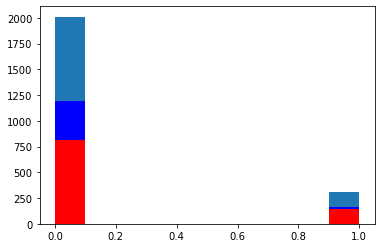

In [94]:
#결과 변수(범주형) 히스토그램 확인
plt.hist(dataset['c_death_6mo'])
plt.hist(dataset[dataset.sex==1]['c_death_6mo'],color="blue",label="male")
plt.hist(dataset[dataset.sex==2]['c_death_6mo'],color="red",label="female")
collections.Counter(dataset['c_death_6mo'])

In [5]:
dataset.corr()

,modality_ivtpa,modality_iauk,modality_mechanical,modality_etc,sex,body_height,body_weight,waist,initial_sbp_cal,initial_dbp_cal,...,com_connective_dz,com_anemia,com_dm,com_dm_end_organ,com_hiv,com_solid_tumor,com_leukemia,com_lymphoma,com_metastatic_tumor,active_cancer
modality_ivtpa,1.000000,-0.149134,-0.544715,-0.011650,-0.066508,0.087139,0.090964,0.025584,0.030697,0.064193,...,0.000313,0.088327,0.080433,0.020269,-0.014652,0.029738,0.025565,0.007579,0.108707,0.099939
modality_iauk,-0.149134,1.000000,-0.120744,0.018773,0.005389,0.004528,-0.034054,0.009893,0.041567,0.023027,...,-0.028539,0.019971,-0.009701,-0.011785,-0.056625,0.028044,0.013207,-0.001641,0.043783,0.040778
modality_mechanical,-0.544715,-0.120744,1.000000,-0.103269,0.086489,-0.079349,-0.069730,-0.058261,-0.108337,-0.116720,...,0.006893,-0.098383,-0.097908,0.008661,-0.021118,-0.052269,-0.012591,0.009056,-0.089964,-0.096608
modality_etc,-0.011650,0.018773,-0.103269,1.000000,-0.063776,0.045322,0.038552,0.007035,-0.013303,0.001715,...,0.014068,-0.000574,0.016229,0.000808,0.002856,0.014712,0.004949,-0.027155,0.010071,0.005044
sex,-0.066508,0.005389,0.086489,-0.063776,1.000000,-0.707023,-0.468748,-0.088865,-0.003941,-0.057305,...,0.008256,-0.056010,-0.021660,0.018345,0.017483,-0.030914,0.005937,0.017275,-0.015502,-0.040012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
com_solid_tumor,0.029738,0.028044,-0.052269,0.014712,-0.030914,0.016488,0.047197,0.039656,0.031865,0.037101,...,-0.029061,0.143256,0.038179,0.008773,-0.005900,1.000000,0.035437,0.035806,0.126644,0.349959
com_leukemia,0.025565,0.013207,-0.012591,0.004949,0.005937,-0.047462,-0.036860,-0.021510,0.017406,0.005384,...,-0.003684,0.058154,0.017167,-0.005664,-0.000748,0.035437,1.000000,0.141931,-0.007066,0.044053
com_lymphoma,0.007579,-0.001641,0.009056,-0.027155,0.017275,-0.008406,0.024694,0.006021,0.029077,0.010690,...,-0.008531,0.064806,0.001171,-0.013118,-0.001732,0.035806,0.141931,1.000000,0.149043,0.231778
com_metastatic_tumor,0.108707,0.043783,-0.089964,0.010071,-0.015502,0.019751,0.027884,-0.003035,0.092410,0.074682,...,0.002462,0.174268,0.027534,-0.016020,-0.004078,0.126644,-0.007066,0.149043,1.000000,0.704962


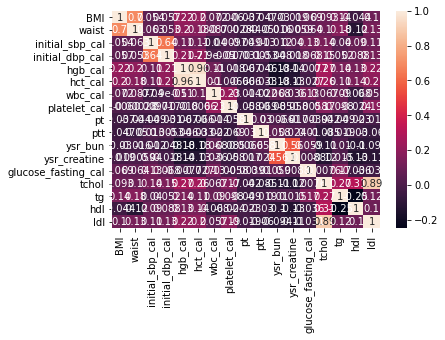

In [97]:
sns.heatmap(dataset_1.corr(), annot=True)

## 결측치 확인

In [29]:
condition = ((dataset['body_weight'].isna()==True) | (dataset['body_height'].isna()==True))
dataset.loc[condition, ['body_weight','body_height']]

,body_weight,body_height
pt_id,,
855,NaN,NaN
856,65.0,NaN
857,NaN,NaN
871,NaN,NaN
878,NaN,NaN
994,NaN,NaN
1029,72.0,NaN
1048,54.0,NaN
1051,NaN,NaN


- 몸무게와 키가 모두 결측인 환자는 29명

In [31]:
condition = ((dataset['death_date'].isna()==False) & (dataset['death_ass_tl'].isna()==True))
dataset.loc[condition, ['death_date','death_ass_tl','c_death_6mo']]

,death_date,death_ass_tl,c_death_6mo
pt_id,,,
1011,2018-10-15,NaN,1


- id = 1011 환자행 삭제